In [2]:
#import statements
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

data = pd.read_csv("C:/Users/Kiruthika Velusamy/Documents/Machine Learning Assignment/cleaned_data.csv");
data= data.drop(['id'], axis=1)
data =data.drop(data.columns[0],axis=1)
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}
for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])
# label_mapping

train, test = train_test_split(data, train_size=0.65)
train_X = train[train.columns.difference(['y'])]
train_Y = train[['y']]
clf=LocalOutlierFactor(n_neighbors=2, metric='minkowski')
y_pred = clf.fit_predict(train_X)

C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


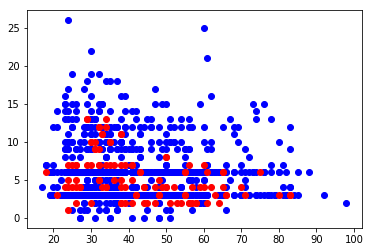

In [3]:
remove_999 = train_X[train_X['pdays']!=999]
clf=LocalOutlierFactor(n_neighbors=2, metric='minkowski')
y_pred = clf.fit_predict(remove_999[['age','pdays']])
remove_999['pred'] = y_pred
axes = plt.subplot()
axes.scatter(remove_999[remove_999['pred']==1]['age'],remove_999[remove_999['pred']==1]['pdays'],c='blue')
axes.scatter(remove_999[remove_999['pred']==-1]['age'],remove_999[remove_999['pred']==-1]['pdays'],c='red')

C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


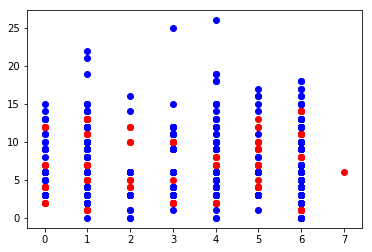

In [4]:
remove_999 = train_X[train_X['pdays']!=999]
clf=LocalOutlierFactor(n_neighbors=6, metric='minkowski')
y_pred = clf.fit_predict(remove_999[['education','pdays']])
remove_999['pred'] = y_pred
axes = plt.subplot()
axes.scatter(remove_999[remove_999['pred']==1]['education'],remove_999[remove_999['pred']==1]['pdays'],c='blue')
axes.scatter(remove_999[remove_999['pred']==-1]['education'],remove_999[remove_999['pred']==-1]['pdays'],c='red')